In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv("Insurance.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Axes: xlabel='region', ylabel='charges'>

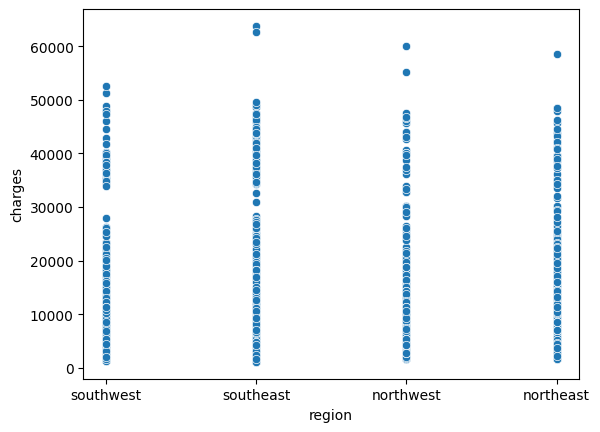

In [3]:
sns.scatterplot(x="region", y="charges", data=data)

<Axes: xlabel='children', ylabel='charges'>

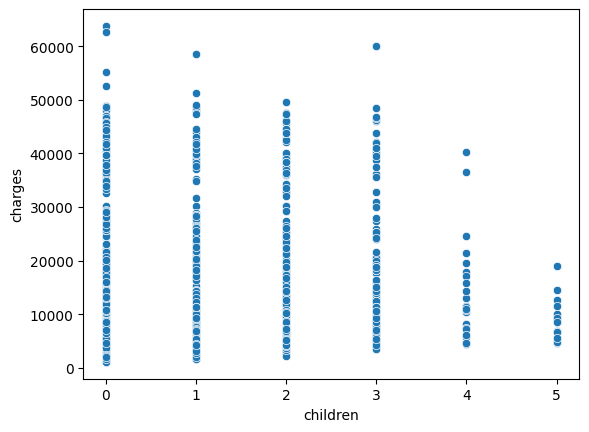

In [4]:
sns.scatterplot(x="children", y="charges", data=data)

<Axes: xlabel='age', ylabel='charges'>

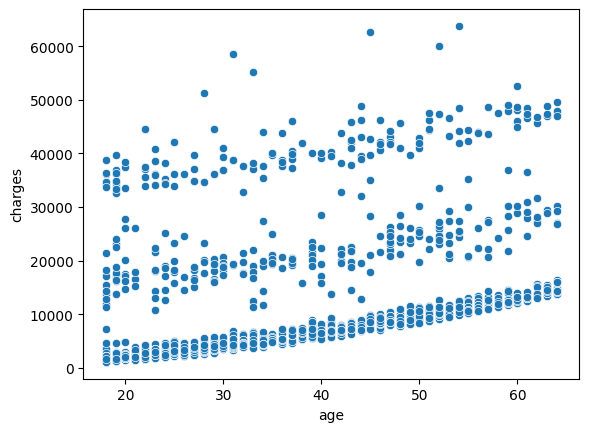

In [5]:
sns.scatterplot(x="age", y="charges", data=data)

<Axes: xlabel='bmi', ylabel='charges'>

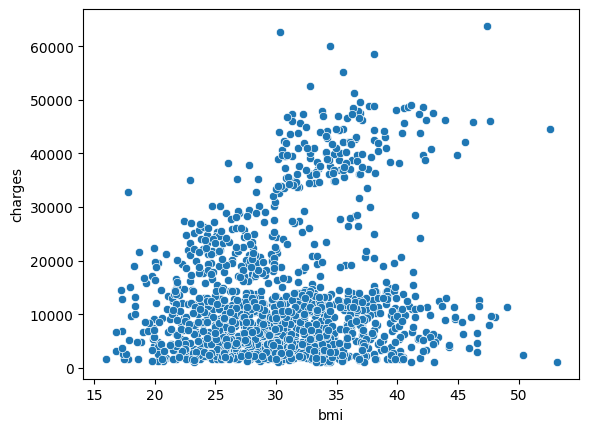

In [6]:
sns.scatterplot(x="bmi", y="charges", data=data)

In [7]:
#data pre-processing

# elemention of the null values

if data.isnull().sum().sum() :
    data = data.dropna()

# elemention of string values

data['smoker'] = data['smoker'].replace(to_replace=['no' , 'yes'], value=[0,1]) # replace smoker, not smoker into 0 , 1

data = data.drop('region' , axis = 1) # we can drop the region since it is not important in prediction

data = pd.get_dummies(data) # converting each text column into counter columns

# normalization for the data (Scaling column ranges to be between [-1,1])
scaler = StandardScaler()
data['charges'] = scaler.fit_transform(data[['charges']])
data['bmi'] = scaler.fit_transform(data[['bmi']])
data['age'] = scaler.fit_transform(data[['age']])
data

C:\Users\imman\AppData\Local\Temp\ipykernel_13044\4067804804.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['smoker'] = data['smoker'].replace(to_replace=['no' , 'yes'], value=[0,1]) # replace smoker, not smoker into 0 , 1


,age,bmi,children,smoker,charges,sex_female,sex_male
0,-1.438764,-0.453320,0,1,0.298584,True,False
1,-1.509965,0.509621,1,0,-0.953689,False,True
2,-0.797954,0.383307,3,0,-0.728675,False,True
3,-0.441948,-1.305531,0,0,0.719843,False,True
4,-0.513149,-0.292556,0,0,-0.776802,False,True
...,...,...,...,...,...,...,...
1333,0.768473,0.050297,3,0,-0.220551,False,True
1334,-1.509965,0.206139,0,0,-0.914002,True,False
1335,-1.509965,1.014878,0,0,-0.961596,True,False
1336,-1.296362,-0.797813,0,0,-0.930362,True,False


In [8]:
correlation = data.corr()
print(correlation)

                 age       bmi  children    smoker   charges  sex_female  \
age         1.000000  0.109272  0.042469 -0.025019  0.299008    0.020856   
bmi         0.109272  1.000000  0.012759  0.003750  0.198341   -0.046371   
children    0.042469  0.012759  1.000000  0.007673  0.067998   -0.017163   
smoker     -0.025019  0.003750  0.007673  1.000000  0.787251   -0.076185   
charges     0.299008  0.198341  0.067998  0.787251  1.000000   -0.057292   
sex_female  0.020856 -0.046371 -0.017163 -0.076185 -0.057292    1.000000   
sex_male   -0.020856  0.046371  0.017163  0.076185  0.057292   -1.000000   

            sex_male  
age        -0.020856  
bmi         0.046371  
children    0.017163  
smoker      0.076185  
charges     0.057292  
sex_female -1.000000  
sex_male    1.000000  


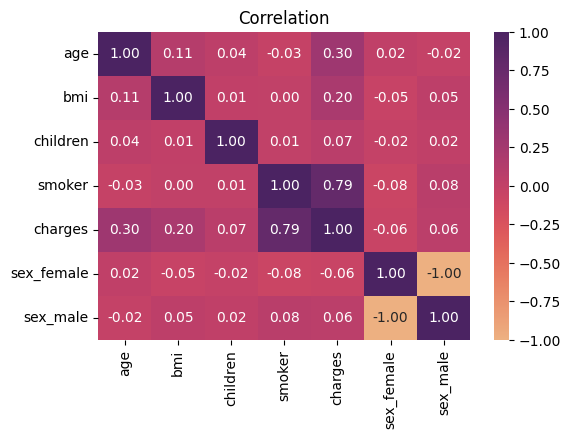

In [9]:
# Create the heatmap using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, cmap='flare', annot=True, fmt=".2f")
plt.title('Correlation')
plt.show()

In [10]:
X = data
y = data['charges']
X = X.drop("charges" , axis = 1)

# divide the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

model = LinearRegression() # define instance
model.fit(X_train, y_train) # passing the data and fit it
score = model.score(X_test , y_test) # test the prediction
score

0.7601485628002145

[0.7601485628002146, 0.8411815282553787, 0.834819991767259, 0.8144571639126514, 0.7730992609447376]


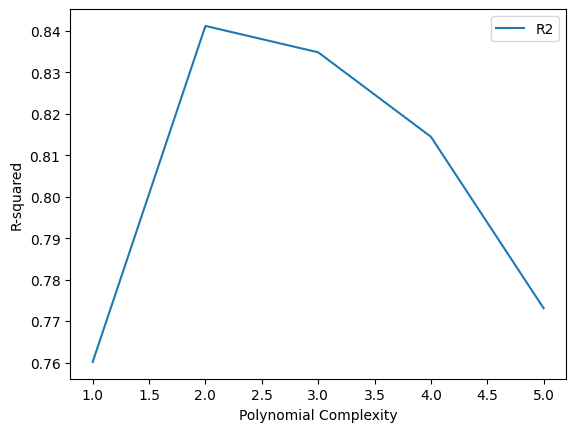

In [11]:
train_rmse_errors=[]
test_rmse_errors=[]
score=[]

for d in range(1,6):
  polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
  poly_features = polynomial_converter.fit_transform(X)
  poly_features.shape
  X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3,random_state=101)
  model = LinearRegression(fit_intercept=True)
  model.fit(X_train,y_train)
  score.append(model.score(X_test,y_test))

  train_pred = model.predict(X_train)
  test_pred = model.predict(X_test)
  train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
  test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
  train_rmse_errors.append(train_RMSE)
  test_rmse_errors.append(test_RMSE)

print(score)
plt.plot(range(1,6),score,label='R2')
plt.xlabel("Polynomial Complexity")
plt.ylabel("R-squared")
plt.legend()

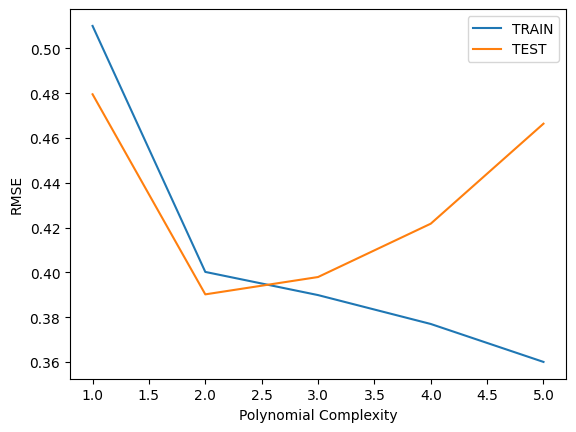

In [12]:
plt.plot(range(1,6),train_rmse_errors,label='TRAIN')
plt.plot(range(1,6),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()